# Level 3 test sites

just a simple notebook to view level 3 test sites and view avaliable data

In [1]:
import datacube
from datacube.storage import masking
from datacube.helpers import write_geotiff
from datacube.utils.geometry import CRS
import pandas
pandas.set_option('display.max_colwidth', 200)
pandas.set_option('display.max_rows', None)
dc = datacube.Datacube(app='load-data')
# dc = datacube.Datacube(env='lccs_dev', app='load-data')

In [2]:
# Define area of interest

# # Ayr
# x = (1500000, 1600000)
# y = (-2200000, -2100000)

# # Diamentina
# x = (800000, 900000)
# y = (-2800000, -2700000)

# # Gwydir
# x = (1600000, 1700000)
# y = (-3400000, -3300000)

# # Leichhardt
# x = (800000, 900000)
# y = (-2000000, -1900000)

# # Kakadu
# x = (0, 50000)
# y = (-1350000, -1300000)
# # y = (-1350000, -1250000)

# # Hobart
# x = (1200000, 1300000)
# y = (-4800000, -4700000)

# Perth
x = (-1550000, -1450000)
y = (-3650000, -3550000)

# # Murray Valley
# x = (1100000, 1200000)
# y = (-4000000, -3900000)

# # Adelaide
# x = (550000, 650000)
# y = (-3850000, -3750000)

# # Lake Eyre
# x = (500000, 600000)
# y = (-3000000, -2900000)

# # Blue mountains
# x = (1600000, 1700000)
# y = (-3900000, -3800000)

# # Australian Alps
# x = (1400000, 1500000)
# y = (-4100000, -4000000)

# # Collier Range
# x = (-1300000, -1200000)
# y = (-2700000, -2600000)

# # Coorong
# x = (600000, 700000)
# y = (-3950000, -3850000)

# # Brisbane
# x = (2000000, 2100000)
# y = (-3200000, -3100000)

# # Dundas
# x = (-1000000, -900000)
# y = (-3650000, -3550000)

res = (-100, 100)
crs = "EPSG:3577"
time = ("2015-01-01", "2015-12-31")
prod = 'ls8_nbart_geomedian_annual'
query =({'x':x,
        'y':y,
        'crs':crs,
        'resolution':res})

In [3]:
# dc.list_products()
dc.list_measurements()
# dc.find_datasets(product = 'ls5_pq_albers', time = time, **query) 

name  \
product                      measurement                                                  
bom_rainfall_grids           rainfall                                          rainfall   
dsm                          elevation                                        elevation   
                             slope                                                slope   
dsm1sv10                     elevation                                        elevation   
fc_percentile_albers_annual  BS_PC_10                                          BS_PC_10   
                             PV_PC_10                                          PV_PC_10   
                             NPV_PC_10                                        NPV_PC_10   
                             BS_PC_50                                          BS_PC_50   
                             PV_PC_50                                          PV_PC_50   
                             NPV_PC_50                                        NPV_PC_50   
                             BS_PC_90                                          BS_PC_90   
                             PV_PC_90                                          PV_PC_90   
                             NPV_PC_90                                        NPV_PC_90   
gamma_ray                    rad_air_dose_rate_unfiltered  rad_air_dose_rate_unfiltered   
                             rad_k_equiv_conc_unfiltered    rad_k_equiv_conc_unfiltered   
                             rad_u_equiv_conc_unfiltered    rad_u_equiv_conc_unfiltered   
                             rad_th_equiv_conc_unfiltered  rad_th_equiv_conc_unfiltered   
                             rad_air_dose_rate_filtered      rad_air_dose_rate_filtered   
                             rad_k_equiv_conc_filtered        rad_k_equiv_conc_filtered   
                             rad_u_equiv_conc_filtered        rad_u_equiv_conc_filtered   
                             rad_th_equiv_conc_filtered      rad_th_equiv_conc_filtered   
                             rad_ratio_tk                                  rad_ratio_tk   
                             rad_ratio_u2t                                rad_ratio_u2t   
                             rad_ratio_uk                                  rad_ratio_uk   
                             rad_ratio_ut                                  rad_ratio_ut   
high_tide_comp_20p           blue                                                  blue   
                             green                                                green   
                             red                                                    red   
                             nir                                                    nir   
                             swir1                                                swir1   
                             swir2                                                swir2   
high_tide_comp_count         count_observations                      count_observations   
item_v2                      relative                                          relative   
item_v2_conf                 stddev                                              stddev   
low_tide_comp_20p            blue                                                  blue   
                             green                                                green   
                             red                                                    red   
                             nir                                                    nir   
                             swir1                                                swir1   
                             swir2                                                swir2   
low_tide_comp_count          count_observations                      count_observations   
ls5_fc_albers                BS                                                      BS   
                             PV                                                

In [9]:
# Load data from datacube
load_data = dc.load(product=prod, 
                 time=time, **query)
load_data = masking.mask_invalid_data(load_data)

<xarray.Dataset>
Dimensions:  (time: 1, x: 1000, y: 1000)
Coordinates:
  * time     (time) datetime64[ns] 2015-01-01
  * y        (y) float64 -3.55e+06 -3.55e+06 -3.55e+06 ... -3.65e+06 -3.65e+06
  * x        (x) float64 -1.55e+06 -1.55e+06 -1.55e+06 ... -1.45e+06 -1.45e+06
Data variables:
    blue     (time, y, x) float64 302.0 295.0 301.0 318.0 ... 270.0 272.0 289.0
    green    (time, y, x) float64 177.0 159.0 169.0 171.0 ... 384.0 393.0 430.0
    red      (time, y, x) float64 109.0 94.0 104.0 110.0 ... 437.0 449.0 476.0
    nir      (time, y, x) float64 93.0 77.0 86.0 ... 1.928e+03 2.132e+03
    swir1    (time, y, x) float64 82.0 67.0 77.0 ... 1.426e+03 1.512e+03
    swir2    (time, y, x) float64 70.0 60.0 67.0 72.0 ... 724.0 740.0 770.0
Attributes:
    crs:      EPSG:3577

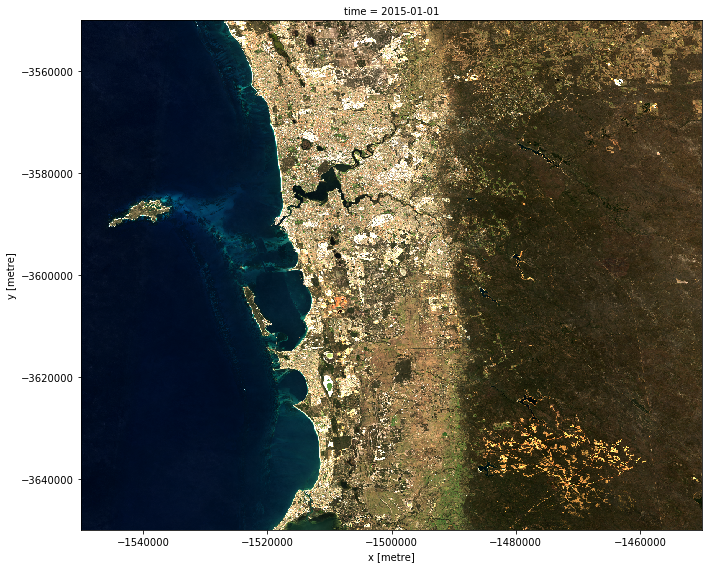

In [14]:
# %matplotlib notebook
# Plot output
load_data[['red', 'green', 'blue']].to_array().plot.imshow(col='time', robust=True, figsize=(10, 8))
# load_data[['swir1', 'nir', 'green']].to_array().plot.imshow(col='time', robust=True, figsize=(8, 6))

In [6]:
# # write to geotiff
# load_data=load_data.squeeze()
# write_geotiff(filename='load_data.tif', dataset=load_data)